In [117]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pickle as pk
import warnings
warnings.filterwarnings("ignore")

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):


/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-pa

In [11]:
df = pd.read_csv("Bitcoin Historical Data - Investing.com India.csv",index_col=0,parse_dates=['Date'])

In [12]:
df.head() #first five rows of the data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-16,"61,635.6","61,669.2","62,329.2","61,123.2",96.15K,-0.06%
2021-10-15,"61,672.5","57,348.2","62,892.8","56,874.8",121.48K,7.54%
2021-10-14,"57,345.8","57,370.4","58,506.5","56,866.8",59.84K,-0.06%
2021-10-13,"57,380.1","56,014.5","57,697.4","54,314.4",73.62K,2.44%
2021-10-12,"56,015.9","57,480.6","57,635.7","54,155.4",74.85K,-2.54%


In [13]:
df.shape

(366, 6)

In [14]:
print("Number of data points:",df.shape[0])

Number of data points: 366


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-10-16 to 2020-10-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     366 non-null    object
 1   Open      366 non-null    object
 2   High      366 non-null    object
 3   Low       366 non-null    object
 4   Vol.      366 non-null    object
 5   Change %  366 non-null    object
dtypes: object(6)
memory usage: 20.0+ KB


In [16]:
df['Price'] = df['Price'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')
df['Change %'] = df['Change %'].str.replace('%', '')

In [17]:
df['Price'] = df['Price'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Change %'] = df['Change %'].astype(float)

In [18]:
mul = {'M':1e6, 'K': 1e3}
conv = lambda num: float(num[:-1]) * mul[num[-1].upper()]
conv('2.3M')

2300000.0

In [19]:
df['Vol.'] = df['Vol.'].apply(conv)

In [20]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-16,61635.6,61669.2,62329.2,61123.2,96150.0,-0.06
2021-10-15,61672.5,57348.2,62892.8,56874.8,121480.0,7.54
2021-10-14,57345.8,57370.4,58506.5,56866.8,59840.0,-0.06
2021-10-13,57380.1,56014.5,57697.4,54314.4,73620.0,2.44
2021-10-12,56015.9,57480.6,57635.7,54155.4,74850.0,-2.54


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-10-16 to 2020-10-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     366 non-null    float64
 1   Open      366 non-null    float64
 2   High      366 non-null    float64
 3   Low       366 non-null    float64
 4   Vol.      366 non-null    float64
 5   Change %  366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [22]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [23]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,39385.876230,39249.803279,40515.248087,37900.402459,116193.770492,0.550273
std,13869.729997,13896.124192,14237.803456,13483.820957,64045.528288,4.269083
min,11322.000000,11321.800000,11402.700000,11224.600000,260.000000,-14.400000
25%,32205.300000,32147.000000,33243.250000,30571.150000,74020.000000,-1.795000
50%,39807.600000,39600.400000,41144.200000,37952.000000,103730.000000,0.280000
75%,49581.550000,49498.925000,51330.925000,48259.925000,137812.500000,2.795000
max,63540.900000,63544.200000,64778.000000,62067.500000,607100.000000,19.410000


In [24]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-16,61635.6,61669.2,62329.2,61123.2,96150.0,-0.06
2021-10-15,61672.5,57348.2,62892.8,56874.8,121480.0,7.54
2021-10-14,57345.8,57370.4,58506.5,56866.8,59840.0,-0.06
2021-10-13,57380.1,56014.5,57697.4,54314.4,73620.0,2.44
2021-10-12,56015.9,57480.6,57635.7,54155.4,74850.0,-2.54


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-10-16 to 2020-10-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     366 non-null    float64
 1   Open      366 non-null    float64
 2   High      366 non-null    float64
 3   Low       366 non-null    float64
 4   Vol.      366 non-null    float64
 5   Change %  366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


### Histogram

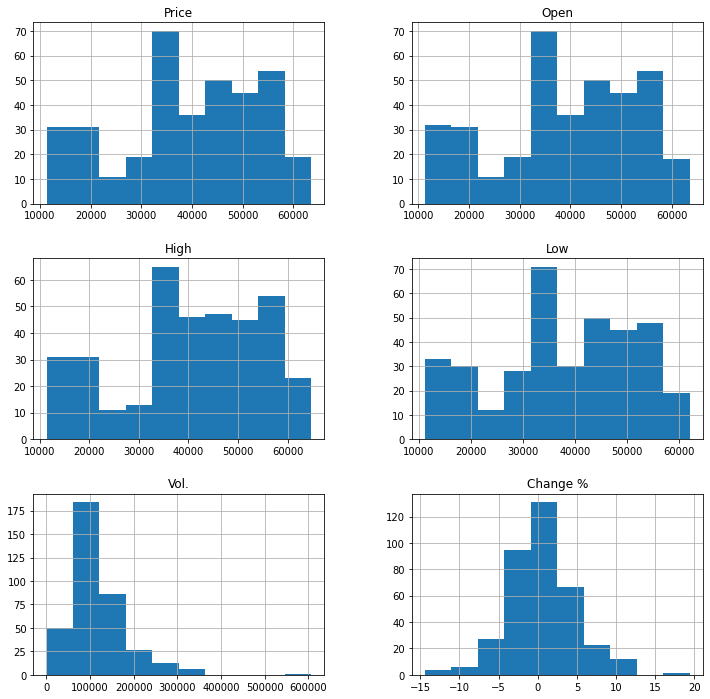

In [26]:
df.hist(figsize=(12,12))
plt.show()

### Correlation Heatmap

<AxesSubplot:>

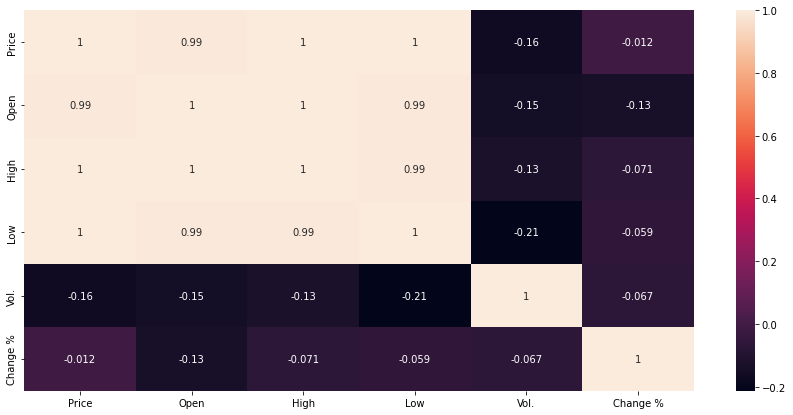

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

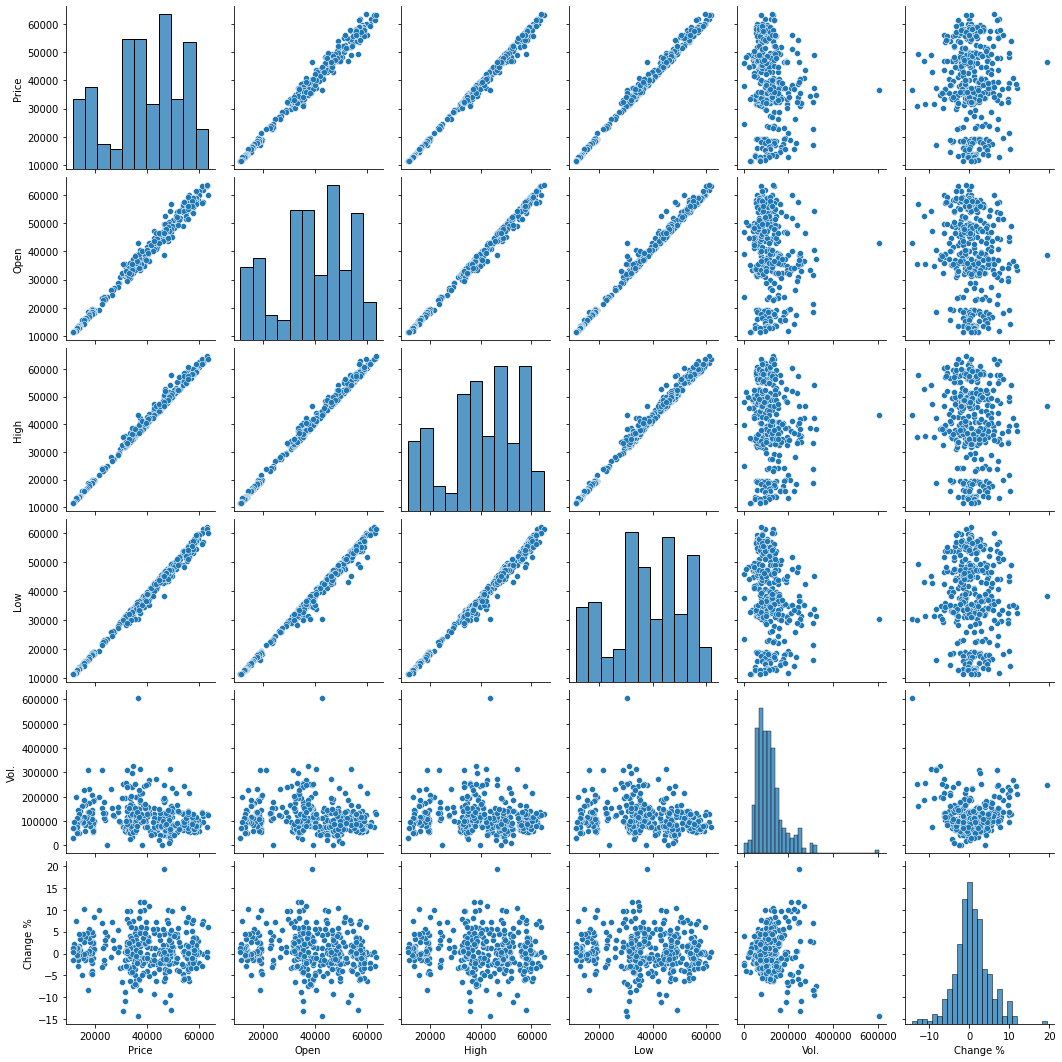

In [28]:
sns.pairplot(df)

# Before Removing Outliers

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
def ploting(df,st):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,2)
    sns.boxplot(df[st])
    plt.show()

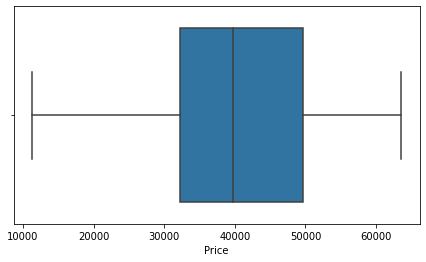

In [30]:
ploting(df,'Price')

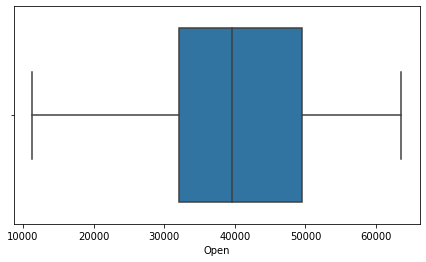

In [31]:
ploting(df,'Open')

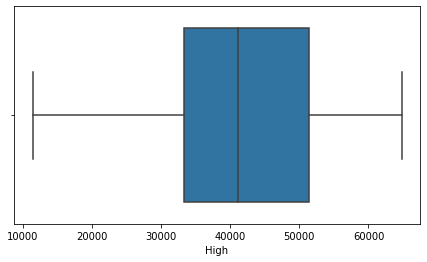

In [32]:
ploting(df,'High')

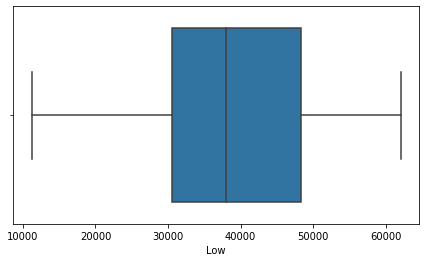

In [33]:
ploting(df,'Low')

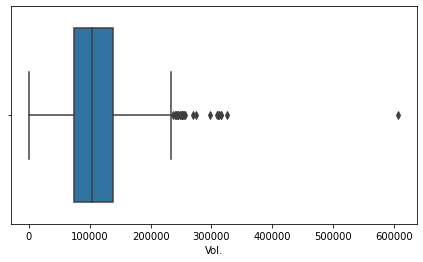

In [34]:
ploting(df,'Vol.')

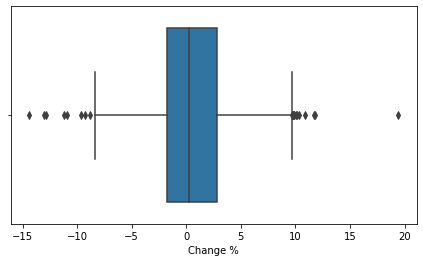

In [35]:
ploting(df,'Change %')

# Detecting Outliers

In [36]:
# Detecting Outliers 
import numpy as np
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [37]:
price_outliers = detect_outliers_zscore(df['Price'])
print("Outliers from Z-scores method: ", price_outliers)

Outliers from Z-scores method:  []


In [38]:
open_outliers = detect_outliers_zscore(df['Open'])
print("Outliers from Z-scores method: ", open_outliers)

Outliers from Z-scores method:  []


In [39]:
high_outliers = detect_outliers_zscore(df['High'])
print("Outliers from Z-scores method: ", high_outliers)

Outliers from Z-scores method:  []


In [40]:
low_outliers = detect_outliers_zscore(df['Low'])
print("Outliers from Z-scores method: ", low_outliers)

Outliers from Z-scores method:  []


In [41]:
vol_outliers = detect_outliers_zscore(df['Vol.'])
print("Outliers from Z-scores method: ", vol_outliers)

Outliers from Z-scores method:  [309650.0, 325730.0, 315500.0, 607100.0, 315070.0, 310740.0, 312070.0]


In [42]:
vol_outliers = detect_outliers_zscore(df['Vol.'])
print("Outliers from Z-scores method: ", vol_outliers)

Outliers from Z-scores method:  [309650.0, 325730.0, 315500.0, 607100.0, 315070.0, 310740.0, 312070.0, 309650.0, 325730.0, 315500.0, 607100.0, 315070.0, 310740.0, 312070.0]


In [43]:
change_outliers = detect_outliers_zscore(df['Change %'])
print("Outliers from Z-scores method: ", change_outliers)

Outliers from Z-scores method:  [309650.0, 325730.0, 315500.0, 607100.0, 315070.0, 310740.0, 312070.0, 309650.0, 325730.0, 315500.0, 607100.0, 315070.0, 310740.0, 312070.0, -14.4, -12.9, 19.41, -13.06]


# Finding IQR

In [44]:
def finding_Iqr(df,st):
    #lets find the IQR (inter quantile range)
    Q1 = df[st].quantile(0.25)
    Q3 = df[st].quantile(0.75)
    IQR = Q3-Q1
    lower_boundry = Q1 -1.5*IQR
    upper_boundry = Q3 +1.5*IQR
    
    return lower_boundry , upper_boundry

In [45]:
#Finding Price Limit
lower_price, upper_price = finding_Iqr(df,'Price')
print('upper limit is' , upper_price)
print('lower limit is' , lower_price)

upper limit is 75645.92500000002
lower limit is 6140.924999999992


In [46]:
#Finding Open Limit
lower_open, upper_open = finding_Iqr(df,'Open')
print('upper limit is' , upper_open)
print('lower limit is' , lower_open)

upper limit is 75526.8125
lower limit is 6119.112499999996


In [47]:
#Finding High Limit
lower_high, upper_high = finding_Iqr(df,'High')
print('upper limit is' , upper_high)
print('lower limit is' , lower_high)

upper limit is 78462.4375
lower limit is 6111.737499999996


In [48]:
#Finding Low Limit
lower_low, upper_low = finding_Iqr(df,'Low')
print('upper limit is' , upper_low)
print('lower limit is' , lower_low)

upper limit is 74793.08750000001
lower limit is 4037.9874999999993


In [49]:
#Finding Vol Limit
lower_vol, upper_vol = finding_Iqr(df,'Vol.')
print('upper limit is' , upper_vol)
print('lower limit is' , lower_vol)

upper limit is 233501.25
lower limit is -21668.75


In [50]:
#Finding Vol Limit
lower_change, upper_change = finding_Iqr(df,'Change %')
print('upper limit is' , upper_change)
print('lower limit is' , lower_change)

upper limit is 9.68
lower limit is -8.68


# Removing Outliers

In [51]:
#Removing Outliers for Price
outliers_price = np.where(df['Price'] > upper_price,True ,np.where(df['Price']< lower_price, True , False))
outliers_price

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [52]:
#Removing Outliers for Open
outliers_open = np.where(df['Open'] > upper_open,True ,np.where(df['Price']< lower_open, True , False))
outliers_open

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [53]:
#Removing Outliers for High
outliers_high = np.where(df['High'] > upper_high,True ,np.where(df['High']< lower_high, True , False))
outliers_high

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [54]:
#Removing Outliers for Low
outliers_low = np.where(df['Low'] > upper_low,True ,np.where(df['Low']< lower_low, True , False))
outliers_low

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [55]:
#Removing Outliers for vol
outliers_vol = np.where(df['Vol.'] > upper_vol,True ,np.where(df['Vol.']< lower_vol, True , False))
outliers_vol

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [56]:
#Removing Outliers for Changes
outliers_change = np.where(df['Change %'] > upper_change,True ,np.where(df['Vol.']< lower_change, True , False))
outliers_change

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [57]:
df['Price']= np.where(df['Price']> upper_price , upper_price,np.where(df['Price'] < lower_price , lower_price ,df['Price']))
df['Open']= np.where(df['Open']> upper_open , upper_open,np.where(df['Open'] < lower_open , lower_open ,df['Open']))
df['High']= np.where(df['High']> upper_high , upper_high,np.where(df['High'] < lower_high , lower_high,df['High']))
df['Low']= np.where(df['Low']> upper_low , upper_low,np.where(df['Low'] < lower_low , lower_low,df['Low']))
df['Vol.']= np.where(df['Vol.']> upper_vol , upper_vol,np.where(df['Vol.'] < lower_vol , lower_vol,df['Vol.']))
df['Change %']= np.where(df['Change %']> upper_change , upper_change,np.where(df['Change %'] < lower_change , lower_change,df['Change %']))

# After Removing Outliers

In [58]:
def boxplt(df,st):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,2)
    sns.boxplot(df[st])
    plt.show()

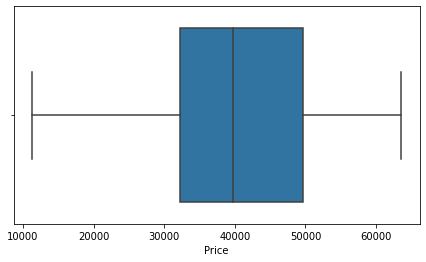

In [59]:
boxplt(df, 'Price')

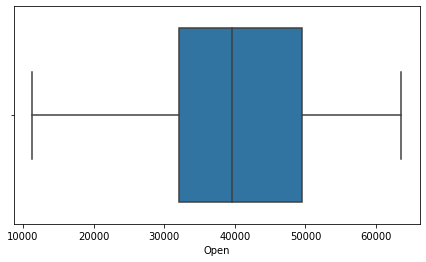

In [60]:
boxplt(df, 'Open')

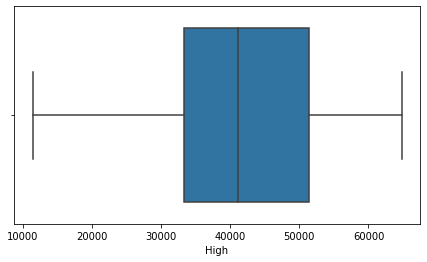

In [61]:
boxplt(df, 'High')

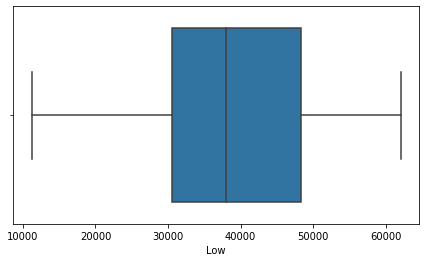

In [62]:
boxplt(df, 'Low')

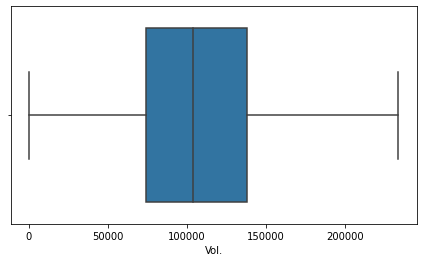

In [63]:
boxplt(df, 'Vol.')

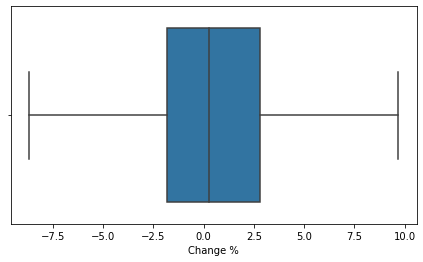

In [64]:
boxplt(df, 'Change %')

### Boxplot

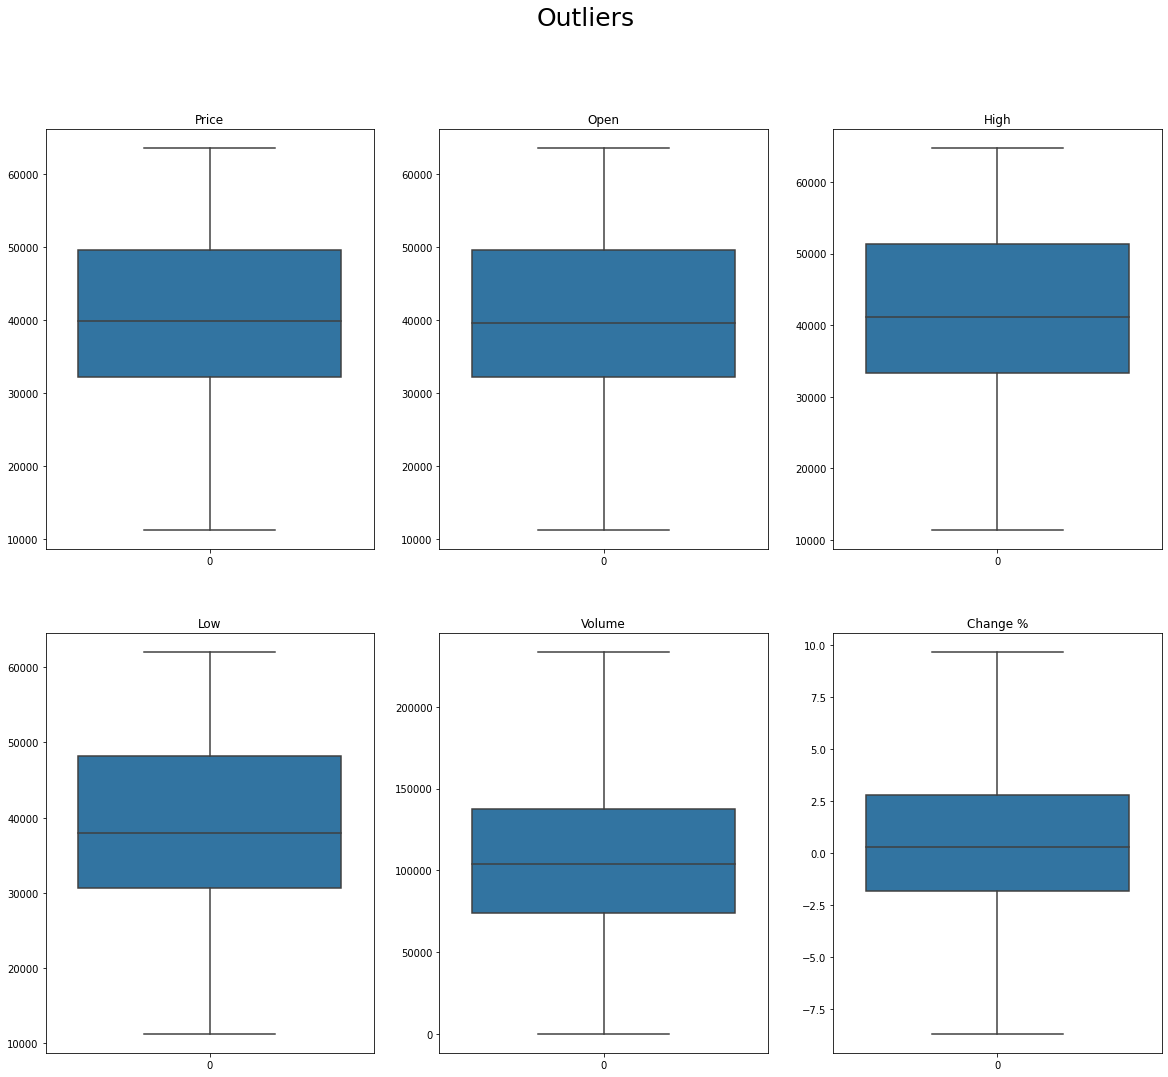

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(20, 17))
fig.suptitle('Outliers', fontsize=25)

ax=sns.boxplot(ax=axes[0,0], data=df['Price'])
ax.set_title('Price')
ax=sns.boxplot(ax=axes[0,1], data=df['Open'])
ax.set_title('Open')
ax=sns.boxplot(ax=axes[0,2], data=df['High'])
ax.set_title('High')
ax=sns.boxplot(ax=axes[1,0], data=df['Low'])
ax.set_title('Low')
ax=sns.boxplot(ax=axes[1,1], data=df['Vol.'])
ax.set_title('Volume')
ax=sns.boxplot(ax=axes[1,2], data=df['Change %'])
ax.set_title('Change %')

plt.show()

In [66]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-16,61635.6,61669.2,62329.2,61123.2,96150.0,-0.06
2021-10-15,61672.5,57348.2,62892.8,56874.8,121480.0,7.54
2021-10-14,57345.8,57370.4,58506.5,56866.8,59840.0,-0.06
2021-10-13,57380.1,56014.5,57697.4,54314.4,73620.0,2.44
2021-10-12,56015.9,57480.6,57635.7,54155.4,74850.0,-2.54
...,...,...,...,...,...,...
2020-10-20,11913.5,11753.9,12029.4,11685.7,94590.0,1.36
2020-10-19,11753.4,11507.1,11823.3,11413.9,73040.0,2.14
2020-10-18,11506.9,11362.1,11506.9,11349.8,31510.0,1.27


## Visualisation and Trends

In [67]:
def partition(x):
  if x<0:
    return 1
  return 0

In [68]:
bit_pred=df['Change %']

In [69]:
up_down=bit_pred.map(partition)

In [70]:
df['Change %']=up_down

In [71]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-16,61635.6,61669.2,62329.2,61123.2,96150.0,1
2021-10-15,61672.5,57348.2,62892.8,56874.8,121480.0,0
2021-10-14,57345.8,57370.4,58506.5,56866.8,59840.0,1
2021-10-13,57380.1,56014.5,57697.4,54314.4,73620.0,0
2021-10-12,56015.9,57480.6,57635.7,54155.4,74850.0,1


In [72]:
df['Change %'].value_counts()

0    200
1    166
Name: Change %, dtype: int64

In [73]:
y=df['Change %']

In [74]:
df.drop(['Change %'], axis=1, inplace=True)
print(df.shape)

(366, 5)


# Performing Standard Scalling

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [76]:
#scaler=StandardScaler()
#scaler.fit(df)
scaler=MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)

MinMaxScaler()

In [77]:
#scaled_data=scaler.transform(df)
scaled_data=scaler.transform(df)

In [78]:
scaled_data

array([[9.63513211e-01, 9.64095867e-01, 9.54121101e-01, 9.81427102e-01,
        4.11119388e-01],
       [9.64219851e-01, 8.81353595e-01, 9.64680292e-01, 8.97867746e-01,
        5.19719389e-01],
       [8.81362878e-01, 8.81778700e-01, 8.82501831e-01, 8.97710398e-01,
        2.55443666e-01],
       ...,
       [3.54086356e-03, 7.71699501e-04, 1.95221385e-03, 2.46248739e-03,
        1.33981446e-01],
       [7.67921193e-04, 0.00000000e+00, 0.00000000e+00, 9.79487795e-04,
        1.26907226e-01],
       [0.00000000e+00, 3.47360520e-03, 2.61356845e-03, 0.00000000e+00,
        3.05091831e-01]])

# Performing PCA

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca=PCA(n_components=2)

In [81]:
pca.fit(scaled_data)

PCA(n_components=2)

In [82]:
x_pca=pca.transform(scaled_data)

In [83]:
scaled_data.shape

(366, 5)

In [84]:
x_pca.shape

(366, 2)

# Train test split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, stratify = y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(256, 2) (110, 2) (256,) (110,)


In [87]:
X_train

array([[-0.21933888,  0.11642328],
       [-0.21108423,  0.03816444],
       [-0.31372771, -0.07276421],
       [-0.75095251, -0.18327609],
       [-0.14632889, -0.17073492],
       [-0.72599784,  0.01676347],
       [-0.41219092, -0.36990099],
       [ 0.25748414,  0.10266655],
       [ 0.00181508, -0.14531785],
       [-0.46154929, -0.19661429],
       [-0.64992476, -0.17354632],
       [ 0.21619818, -0.06766577],
       [-0.22654444,  0.18889306],
       [-0.26555686, -0.13791395],
       [ 0.30739651,  0.1592125 ],
       [-0.85193664,  0.13818215],
       [-0.62054776,  0.12536485],
       [-0.34530066, -0.13381967],
       [-0.587084  , -0.06628153],
       [ 0.14541931, -0.08126335],
       [-0.3902828 , -0.24528342],
       [ 1.029403  , -0.44745224],
       [ 0.11405528,  0.09266082],
       [-0.11935768, -0.06996175],
       [ 0.16223125, -0.38266053],
       [-0.81087849, -0.16129125],
       [ 0.13577821, -0.04579317],
       [-0.8109315 , -0.05941775],
       [ 0.23852492,

In [88]:
X_test

array([[ 0.17113058,  0.18891606],
       [-0.02628891, -0.16219967],
       [ 0.62051956,  0.01783504],
       [-0.28061972, -0.03454541],
       [ 0.76803541, -0.16298552],
       [-0.525988  ,  0.57359184],
       [ 0.16979217, -0.26271683],
       [ 0.1835799 , -0.14417281],
       [ 0.97713763, -0.32113772],
       [-0.00366083,  0.19048775],
       [-0.20084763, -0.14715785],
       [-0.51554809,  0.2590439 ],
       [ 0.07580932, -0.07645429],
       [-0.06064645, -0.05539475],
       [-0.72599411,  0.02739746],
       [-0.27493227, -0.1356906 ],
       [-0.60147159, -0.1527548 ],
       [-0.4336683 , -0.09169885],
       [ 0.27388042, -0.20914258],
       [-0.27632262, -0.17919121],
       [ 0.97581633,  0.02747338],
       [-0.04338917, -0.15897519],
       [-0.34482051, -0.1358082 ],
       [-0.60011565,  0.17735682],
       [-0.40941146, -0.12475786],
       [-0.11505544, -0.2174828 ],
       [ 0.86752414,  0.18857139],
       [ 0.99874929,  0.04010475],
       [ 0.25685314,

In [89]:
y_train

Date
2021-02-28    1
2021-08-09    0
2021-02-13    1
2021-04-05    0
2021-09-26    0
             ..
2021-06-27    0
2021-02-25    1
2021-06-24    0
2021-06-22    0
2021-01-09    1
Name: Change %, Length: 256, dtype: int64

In [90]:
y_test

Date
2021-05-29    1
2021-08-02    1
2020-12-22    0
2021-02-27    1
2020-12-02    0
             ..
2021-02-24    0
2021-01-19    1
2021-03-17    0
2021-07-27    0
2020-12-17    0
Name: Change %, Length: 110, dtype: int64

# Model Creation

In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[53  7]
 [42  8]]


In [94]:
from sklearn.metrics import accuracy_score,precision_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.5545454545454546


In [95]:
precision_score(y_test, y_pred)

0.5333333333333333

# Model Biulding

In [129]:
file = pk.dump(classifier,open('bitcoin.pkl','wb'))

In [135]:
model = open('bitcoin.pkl','rb')


# Perform Hyperparameter Tuning Using Grid SearchCV

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [100]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [101]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [102]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [103]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [104]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.5545454545454546
Decision Tree Test Accuracy: 0.5545454545454546
RandomForest Test Accuracy: 0.5727272727272728


In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
# define models and parameters
model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1','l2','elasticnet', 'none']
c = np.logspace(0, 4, 10)

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c)
gridsearch = GridSearchCV(model, grid, cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train,y_train)

# summarize results
means = best_model.cv_results_['mean_test_score']
stds = best_model.cv_results_['std_test_score']
params = best_model.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("accuracy: %f (%f) using: %r" % (mean, stdev, param))

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/s

  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-pa

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/s

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_lo

  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_lo

accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'newton-cg'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
accuracy: 0.519834 (0.054439) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'sag'}
accuracy: 0.508145 (0.052267) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
accuracy: 0.515913 (0.049886) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy: 0.515913 (0.049886) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.515913 (0.049886) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy: 0.515913 (0.049886) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
accuracy: 0.515913 (0.049886) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
accuracy: na

and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_trai

In [107]:
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))
print("The model best paramters are:", best_model.best_params_)

The mean accuracy of the model is: 0.5545454545454546
The model best paramters are: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


# Implementing without PCA

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, y, stratify = y, test_size = 0.3)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(256, 5) (110, 5) (256,) (110,)


In [109]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1','l2','elasticnet', 'none']
c = np.logspace(0, 4, 10)

# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1)
grid_result = grid_search.fit(xtrain, ytrain)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("accuracy: %f (%f) using: %r" % (mean, stdev, param))

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Se

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-pa

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Se

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Se

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.war

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-pa

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWa

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-pa

  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ihack-pc/.local

accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'newton-cg'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
accuracy: 0.718703 (0.036655) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'sag'}
accuracy: 0.624887 (0.016928) using: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
accuracy: 0.550754 (0.025044) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy: 0.550754 (0.025044) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.554676 (0.019171) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy: 0.550754 (0.025044) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
accuracy: 0.550754 (0.025044) using: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
accuracy: nan (nan) using: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
accuracy: na

/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ihack-pc/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

In [110]:
print("The mean accuracy of the model is:", grid_result.score(xtest,ytest))
print("The model best paramters are:", grid_result.best_params_)

The mean accuracy of the model is: 0.9727272727272728
The model best paramters are: {'C': 10000.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [111]:
classifier = LogisticRegression(C=1, penalty= 'none', solver= 'lbfgs')
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1, penalty='none')

In [112]:
ypred_train = classifier.predict(xtrain)
ypred_test = classifier.predict(xtest)

In [113]:
cm = confusion_matrix(ytest, ypred_test)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[60  0]
 [ 0 50]]


In [114]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        50

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



In [115]:
print ("Train Accuracy : ", accuracy_score(ytrain, ypred_train))
print ("Test Accuracy : ", accuracy_score(ytest, ypred_test))

Train Accuracy :  1.0
Test Accuracy :  1.0


In [116]:
print("Train Precision Score:", precision_score(ytrain, ypred_train))
print("Test Precision Score:", precision_score(ytest, ypred_test))

Train Precision Score: 1.0
Test Precision Score: 1.0
